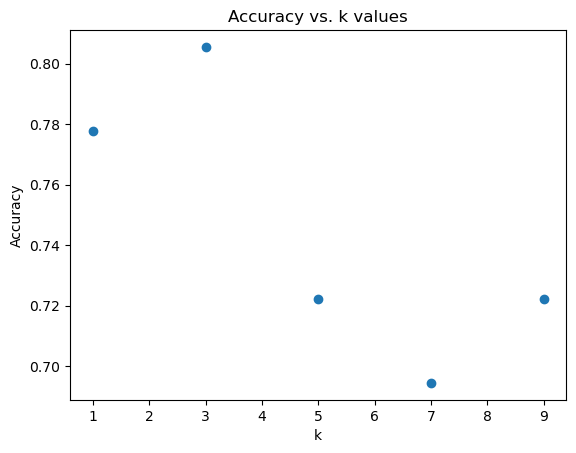

In [4]:
# import Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the k values to test
k_values = [1, 3, 5, 7, 9]
# Train a KNN classifier for each value of k and record the accuracy scores
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    
# KNN for different values
# Plot accuracy against k values
plt.scatter(k_values, accuracy_scores)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k values")
plt.show()

In [6]:
k_values = range(1, 30)
accuracy_scores = []

# Apply KNN for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the best value of k
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Best value of k:", best_k)


Best value of k: 3


In [11]:
# Change p values
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Change p values
# Define the p values to test
p_values = [1, 2, 3, 4, 5]

# Train a KNN classifier for each value of p and record the accuracy scores
accuracy_scores = []
for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=5, p=p)  # Adjust n_neighbors as needed
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [13]:
# Print the accuracy scores for each p value
print("Accuracy scores for each p value:")
for p, accuracy in zip(p_values, accuracy_scores):
    print(f"p={p}: {accuracy}")
print()


Accuracy scores for each p value:
p=1: 0.8055555555555556
p=2: 0.7222222222222222
p=3: 0.7222222222222222
p=4: 0.7222222222222222
p=5: 0.7222222222222222



# Activity-1 (kNN Implementation using sklearn)


Mean Squared Error (default kNN): 6017.6083333333345
Best value of k: 15


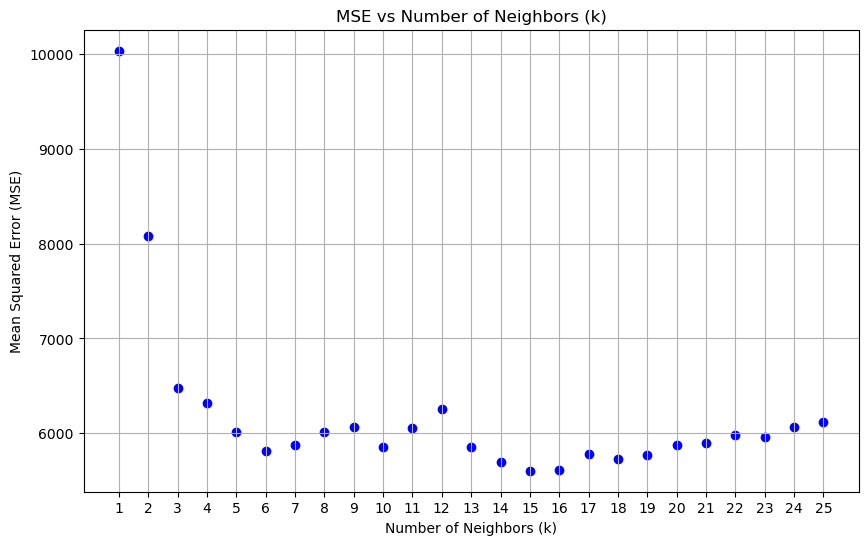

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the headbrain dataset
headbrain_data = pd.read_csv(r"C:\Users\Qadri\Downloads\headbrain.csv")

# Prepare the data
X = headbrain_data.iloc[:, :-1].values
y = headbrain_data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply kNN without specifying arguments
knn_default = KNeighborsRegressor()
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)
mse_default = mean_squared_error(y_test, y_pred_default)
print("Mean Squared Error (default kNN):", mse_default)

# Vary the number of neighbors (k) and print the best value of k
k_values = range(1, 26)
best_k = None
best_mse = float('inf')

X_values = []
Y_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    X_values.append(k)
    Y_values.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_k = k

print("Best value of k:", best_k)

# Scatter plot of accuracy and k value
plt.figure(figsize=(10, 6))
plt.scatter(X_values, Y_values, color='blue')
plt.title('MSE vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(np.arange(1, 26, step=1))
plt.grid(True)
plt.show()


In [19]:
# K-Radius Neighbors
from sklearn.neighbors import RadiusNeighborsClassifier

X = [[0, 1], [0.5, 1], [3, 1], [3, 2], [1.3, 0.8], [2.5, 2.5], [2.4, 2.6]]
y = [0, 0, 1, 1, 0, 1, 1]

neigh = RadiusNeighborsClassifier(radius=1.0)
neigh.fit(X, y)

print(neigh.predict([[1.5, 1.2]]))
print(neigh.predict([[3.0, 2.1]]))


[0]
[1]


# Activity 2

In [21]:
from sklearn.neighbors import RadiusNeighborsClassifier

X = [[1, 0], [1.2, 0.2], [2.5, 1], [3, 1.5], [1, 0.5], [2.5, 2], [2.3, 2.7]]
y = [0, 0, 1, 1, 0, 1, 1]

# Try different values of radius
radius_values = [0.5, 1.0, 1.5, 2.0]

for radius in radius_values:
    neigh = RadiusNeighborsClassifier(radius=radius, outlier_label=1)  # Assign label for outliers
    neigh.fit(X, y)
    print(f"Radius: {radius}")
    try:
        print("Prediction for [1.5, 1.2]:", neigh.predict([[1.5, 1.2]]))
        print("Prediction for [3.0, 2.1]:", neigh.predict([[3.0, 2.1]]))
    except ValueError as e:
        print("Error:", e)
    print()


Radius: 0.5
Prediction for [1.5, 1.2]: [1]
Prediction for [3.0, 2.1]: [1]

Radius: 1.0
Prediction for [1.5, 1.2]: [0]
Prediction for [3.0, 2.1]: [1]

Radius: 1.5
Prediction for [1.5, 1.2]: [0]
Prediction for [3.0, 2.1]: [1]

Radius: 2.0
Prediction for [1.5, 1.2]: [1]
Prediction for [3.0, 2.1]: [1]



# Implementation in Python

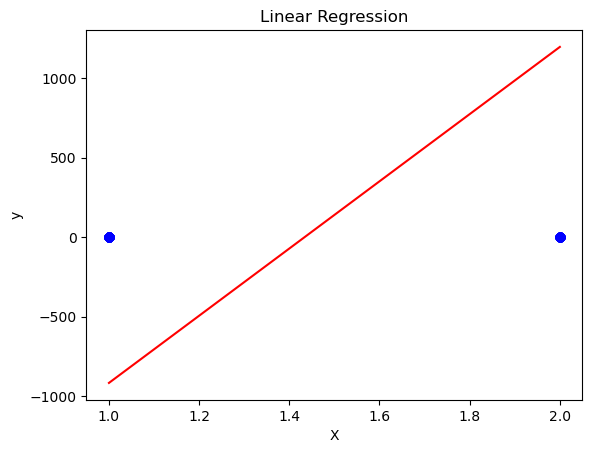

Root Mean Squared Error (RMSE): 1049.0381893175138
R-squared (R2): -4424689.34917216


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
# Assuming your dataset is in a CSV file named 'headbrain.csv' and doesn't have column names
data = pd.read_csv(r"C:\Users\Qadri\Downloads\headbrain.csv", header=None)

# Convert data to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Extract X and y
X = data.iloc[:, 0].values.reshape(-1, 1)  # Assuming the first column is X
y = data.iloc[:, 1].values  # Assuming the second column is y

# Calculate w0 and w1
n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(y)
sum_x_squared = np.sum(X**2)
sum_xy = np.sum(X * y)

w1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
w0 = (sum_y - w1 * sum_x) / n

# Plot Data and Regression Line
plt.scatter(X, y, color='blue')
plt.plot(X, w0 + w1*X, color='red')  # Regression line
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

# Calculate RMSE
y_pred = w0 + w1 * X
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R2
r2 = r2_score(y, y_pred)
print("R-squared (R2):", r2)


In [30]:
# load dataset
import pandas as pd
df=pd.read_csv(r"C:\Users\Qadri\Downloads\headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [31]:
# Computing X and Y
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [32]:
import numpy as np
X_sum = np.sum(X)
X_squared_sum = np.sum(X * X)
n = len(X)
print("Sum of X:", X_sum)
print("Sum of X squared:", X_squared_sum)
print("Length of X:", n)

Sum of X: 861256
Sum of X squared: 3161283190
Length of X: 237


# calculate parameters


In [33]:
# estimate parameters

import numpy as np
# Total number of values
n = len(X)
# calculating cross-deviation and deviation about x
numer=n*np.sum(X*y)-np.sum(X)*np.sum(y)
denom=n*np.sum(X*X)-(np.sum(X))**2
w1=numer/denom
# calculating regression coefficients
w0=(np.sum(y)-w1*(np.sum(X)))/n
w1,w0

(0.2634293394893993, 325.57342104944274)

In [35]:
# plot regression lines
import matplotlib.pyplot as plt

max_x = np.max(X) 
min_x = np.min(X) 
# Calculating line values x and y
x1 = np.linspace(min_x, max_x)
y1 = w0 + w1 * x1
# Ploting Line
plt.plot(x1, y1, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, c='green', label='Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

SyntaxError: invalid non-printable character U+00A0 (3379405406.py, line 4)